In [1]:
'''
This file plots yearly annual mean tau from wombat_jra-iaf_mom025 in
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/SAMexp/figures

*** Run Yang.sh to mount data !! ***

Earl Duran 
created: 14-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')


<IPython.core.display.Javascript object>

In [23]:
data_path = '/Users/earl/Desktop/Yang/'
figures_path = '/Users/earl/Dropbox/wombat_jra-iaf_mom025/figures/'

file_number = np.arange(1958, 2015, 1)

temp = xr.open_dataset(data_path + 'temp_1958-2014.nc')['temp']
t_lat = xr.open_dataset(data_path + 'temp_1958-2014.nc')['yt_ocean']
t_lon1 = xr.open_dataset(data_path + 'temp_1958-2014.nc')['xt_ocean']
t_lon = t_lon1 + 360
temp_mean = np.mean(temp, axis=0)
temp_anom = temp - temp_mean

tau_x = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['tau_x']
tau_y = xr.open_dataset(data_path + 'tau_y_1958-2014.nc')['tau_y']
u_lat = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['yu_ocean']
u_lon1 = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['xu_ocean']
u_lon = u_lon1 + 360
tau_x_mean = np.mean(tau_x, axis=0)
tau_x_anom = tau_x - tau_x_mean

script_name = nb_name[:-6]
print(script_name)
print(temp_mean.shape)


p04_plot_SA_composite
(220, 280)


In [30]:
lon_start = 115
lat_start = -30

boxes_lon_n = 1
boxes_lat_n = 1

boxes_lon_size = 37.5
boxes_lat_size = 15

boxes_lon = {}
boxes_lat = {}
boxes_t_lon_idx = {}
boxes_t_lat_idx = {}
boxes_u_lon_idx = {}
boxes_u_lat_idx = {}

temp_anom_boxes = {}
tau_x_anom_boxes = {}

temp_anom_boxes_mean = {}
tau_x_anom_boxes_mean = {}

temp_anom_boxes_std = {}
tau_x_anom_boxes_std = {}

for lon_idx in range(boxes_lon_n):
    for lat_idx in range(boxes_lat_n):
        
        boxes_lon[str(lon_idx)+','+str(lat_idx)] = \
        [lon_start+lon_idx*boxes_lon_size, lon_start+(lon_idx+1)*boxes_lon_size]
        boxes_lat[str(lon_idx)+','+str(lat_idx)] = \
        [lat_start-lat_idx*boxes_lat_size, lat_start-(lat_idx+1)*boxes_lat_size]
        
        boxes_t_lon_idx[str(lon_idx)+','+str(lat_idx)] = \
        (t_lon >= boxes_lon[str(lon_idx)+','+str(lat_idx)][0]) * \
        (t_lon <= boxes_lon[str(lon_idx)+','+str(lat_idx)][1])
        boxes_t_lat_idx[str(lon_idx)+','+str(lat_idx)] = \
        (t_lat <= boxes_lat[str(lon_idx)+','+str(lat_idx)][0]) * \
        (t_lat >= boxes_lat[str(lon_idx)+','+str(lat_idx)][1])
        
        boxes_u_lon_idx[str(lon_idx)+','+str(lat_idx)] = \
        (u_lon >= boxes_lon[str(lon_idx)+','+str(lat_idx)][0]) * \
        (u_lon <= boxes_lon[str(lon_idx)+','+str(lat_idx)][1])
        boxes_u_lat_idx[str(lon_idx)+','+str(lat_idx)] = \
        (u_lat <= boxes_lat[str(lon_idx)+','+str(lat_idx)][0]) * \
        (u_lat >= boxes_lat[str(lon_idx)+','+str(lat_idx)][1])
        
        temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)] = []
        tau_x_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)] = []

        for idx, t in enumerate(file_number):
            temp_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)] = \
            temp_anom[:,:,boxes_t_lon_idx[str(lon_idx)+','+str(lat_idx)]]\
            [:,boxes_t_lat_idx[str(lon_idx)+','+str(lat_idx)]]\
            [idx]
            
            tau_x_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)] = \
            tau_x_anom[:,:,boxes_u_lon_idx[str(lon_idx)+','+str(lat_idx)]]\
            [:,boxes_u_lat_idx[str(lon_idx)+','+str(lat_idx)]]\
            [idx]
            
            temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)].append(
                np.nanmean(temp_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)]))
            
            tau_x_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)].append(
                np.nanmean(tau_x_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)]))
            
            
        temp_anom_boxes_std[str(lon_idx)+','+str(lat_idx)] = \
        np.nanstd(temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)])

        tau_x_anom_boxes_std[str(lon_idx)+','+str(lat_idx)] = \
        np.nanstd(tau_x_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)])
            

print([str(lon_idx)+','+str(lat_idx)])
#print(temp_anom_boxes[str(lon_idx)+','+str(lat_idx)+':'+str(t)])
print(temp_anom_boxes_mean['0,0'])
print(temp_anom_boxes_std[str(lon_idx)+','+str(lat_idx)])

with open('SA.pkl', 'wb') as f:
    pickle.dump(\
                [boxes_t_lon_idx, boxes_t_lat_idx,\
                 temp_anom_boxes, tau_x_anom_boxes, \
                 temp_anom_boxes_mean, tau_x_anom_boxes_mean,\
                 temp_anom_boxes_std, tau_x_anom_boxes_std], f)


['0,0']
[-0.24188946, 0.37871411, -0.16682538, 0.62729448, 0.41314292, 0.47242728, 0.10415566, 0.037730899, 0.18588352, 0.29233882, -0.32546237, -0.1303248, -0.15836646, 0.085564278, 0.37266162, 0.19596907, 0.42505834, 0.13982572, 0.4178941, 0.089171253, 0.19453427, 0.071785286, -0.20450859, -0.18965919, -0.2349284, 0.068940572, -0.086820044, 0.052626934, -0.37900105, -0.47047561, 0.16476205, 0.18521272, 0.05441336, -0.012680887, 0.21519662, -0.072675392, -0.36685497, -0.14597328, -0.39637819, -0.16788189, -0.28658816, 0.072697759, 0.11635549, 0.0087586753, -0.33354104, -0.092206381, -0.37860423, -0.2207073, -0.39834645, -0.069418497, -0.21896496, -0.27493888, 0.022943811, 0.03846363, 0.1150947, 0.20257127, 0.20183364]
0.253921


In [31]:
temp_anom_boxes_mean_compos_warm_std1p25_idx = {}
years_temp_anom_boxes_mean_compos_warm_std1p25_idx = {}
years_temp_anom_boxes_mean_compos_warm_std1p25 = {}
temp_anom_boxes_mean_compos_warm_std1p25 = {}
tau_x_anom_boxes_mean_compos_warm_std1p25 = {}

for lon_idx in range(boxes_lon_n):
    for lat_idx in range(boxes_lat_n):
        temp_anom_boxes_mean_compos_warm_std1p25_idx[str(lon_idx)+','+str(lat_idx)] = \
        temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)] >= \
        temp_anom_boxes_std[str(lon_idx)+','+str(lat_idx)]*1.25
        
        years_temp_anom_boxes_mean_compos_warm_std1p25_idx[str(lon_idx)+','+str(lat_idx)] = \
        np.where(temp_anom_boxes_mean_compos_warm_std1p25_idx[str(lon_idx)+','+str(lat_idx)])[0]
        
        years_temp_anom_boxes_mean_compos_warm_std1p25[str(lon_idx)+','+str(lat_idx)] = \
        file_number[years_temp_anom_boxes_mean_compos_warm_std1p25_idx[str(lon_idx)+','+str(lat_idx)]]
        
        temp_anom_boxes_mean_compos_warm_std1p25[str(lon_idx)+','+str(lat_idx)] = \
        np.nanmean(temp_anom[
            years_temp_anom_boxes_mean_compos_warm_std1p25_idx[str(lon_idx)+','+str(lat_idx)],:,:],axis=0)
        
        tau_x_anom_boxes_mean_compos_warm_std1p25[str(lon_idx)+','+str(lat_idx)] = \
        np.nanmean(tau_x_anom[
            years_temp_anom_boxes_mean_compos_warm_std1p25_idx[str(lon_idx)+','+str(lat_idx)],:,:],axis=0)
        
        

/Users/earl/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/earl/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


In [32]:
temp_anom_boxes_mean_compos_cold_std1p25_idx = {}
years_temp_anom_boxes_mean_compos_cold_std1p25_idx = {}
years_temp_anom_boxes_mean_compos_cold_std1p25 = {}
temp_anom_boxes_mean_compos_cold_std1p25 = {}
tau_x_anom_boxes_mean_compos_cold_std1p25 = {}

for lon_idx in range(boxes_lon_n):
    for lat_idx in range(boxes_lat_n):
        temp_anom_boxes_mean_compos_cold_std1p25_idx[str(lon_idx)+','+str(lat_idx)] = \
        temp_anom_boxes_mean[str(lon_idx)+','+str(lat_idx)] <= \
        -temp_anom_boxes_std[str(lon_idx)+','+str(lat_idx)]*1.25
        
        years_temp_anom_boxes_mean_compos_cold_std1p25_idx[str(lon_idx)+','+str(lat_idx)] = \
        np.where(temp_anom_boxes_mean_compos_cold_std1p25_idx[str(lon_idx)+','+str(lat_idx)])[0]
        
        years_temp_anom_boxes_mean_compos_cold_std1p25[str(lon_idx)+','+str(lat_idx)] = \
        file_number[years_temp_anom_boxes_mean_compos_cold_std1p25_idx[str(lon_idx)+','+str(lat_idx)]]
        
        temp_anom_boxes_mean_compos_cold_std1p25[str(lon_idx)+','+str(lat_idx)] = \
        np.nanmean(temp_anom[
            years_temp_anom_boxes_mean_compos_cold_std1p25_idx[str(lon_idx)+','+str(lat_idx)],:,:],axis=0)
        
        tau_x_anom_boxes_mean_compos_cold_std1p25[str(lon_idx)+','+str(lat_idx)] = \
        np.nanmean(tau_x_anom[
            years_temp_anom_boxes_mean_compos_cold_std1p25_idx[str(lon_idx)+','+str(lat_idx)],:,:],axis=0)
        
        

/Users/earl/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/Users/earl/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


In [33]:
bm = Basemap(projection='mill', llcrnrlat=-60,urcrnrlat=-20,\
llcrnrlon=100,urcrnrlon=170, resolution='c')

matplotlib.rcParams.update({'font.size': 14}) 
row = 1
col = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: ax

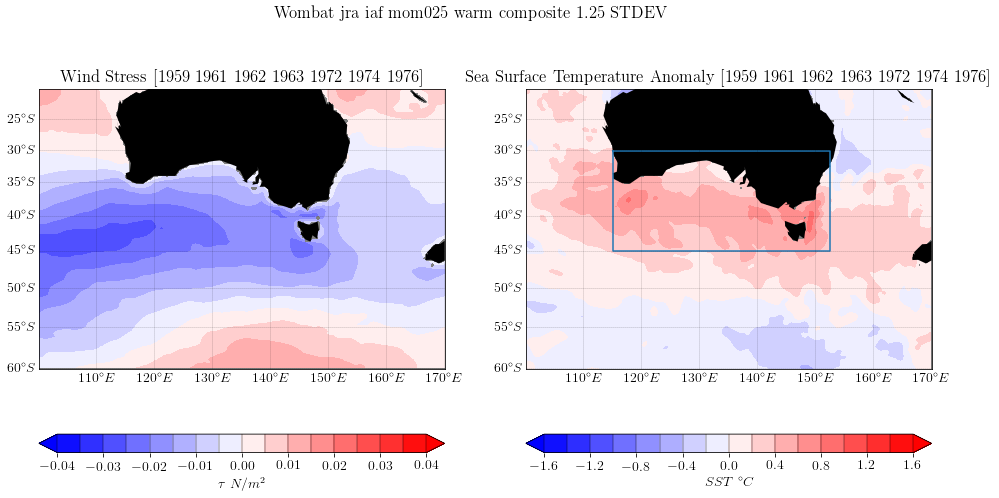

In [37]:
for lon_idx in range(boxes_lon_n):
    for lat_idx in range(boxes_lat_n):      
        plt.close('all') 
        fig = plt.figure() 
        fig.set_size_inches(16, 8)

        ax = fig.add_subplot(row,col,1)
        cmap = plt.get_cmap('bwr')
        step = 0.005
        contf_lvls = np.arange(-0.04,0.04+1e-08,step)              

        ax.set_facecolor('grey')
        bm.drawcoastlines(linewidth=0.05)
        bm.fillcontinents(color='black')

        lons, lats = np.meshgrid(u_lon, u_lat)
        Bm_lons, Bm_lats = bm(lons, lats) 

        contf = bm.contourf(Bm_lons, Bm_lats, \
                            tau_x_anom_boxes_mean_compos_warm_std1p25[str(lon_idx)+','+str(lat_idx)], \
                            contf_lvls, cmap=cmap, extend='both')

        ax.set_title('Wind Stress ' + \
                     str(years_temp_anom_boxes_mean_compos_warm_std1p25[str(lon_idx)+','+str(lat_idx)]))

        bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
        bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])

        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$\tau$ $N/m^{2}$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])



        ax = fig.add_subplot(row,col,2)
        cmap = plt.get_cmap('bwr')
        step = 0.2
        contf_lvls = np.arange(-1.6,1.6+1e-08,step)              

        ax.set_facecolor('grey')
        bm.drawcoastlines(linewidth=0.05)
        bm.fillcontinents(color='black')

        lons, lats = np.meshgrid(t_lon, t_lat)
        Bm_lons, Bm_lats = bm(lons, lats) 

        contf = bm.contourf(Bm_lons, Bm_lats, \
                            temp_anom_boxes_mean_compos_warm_std1p25[str(lon_idx)+','+str(lat_idx)], \
                            contf_lvls, cmap=cmap, extend='both')
        
        Bm_boxes_lon, Bm_boxes_lat = bm(\
            [boxes_lon[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][0]],\
            [boxes_lat[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][0]])
        plot = bm.plot(Bm_boxes_lon,Bm_boxes_lat)

        ax.set_title('Sea Surface Temperature Anomaly ' + \
                     str(years_temp_anom_boxes_mean_compos_warm_std1p25[str(lon_idx)+','+str(lat_idx)]))

        bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
        bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])

        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$SST$ $^{\circ}C$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])

        plt.suptitle(r"Wombat jra iaf mom025 warm composite 1.25 STDEV")
        
        output_ls = os.listdir(figures_path)
        if not script_name:
            script_name = 'test'
        elif script_name not in output_ls:
            os.mkdir(figures_path + '/' + script_name)

        plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
                    + '_fig1_' + str(lon_idx)+'-'+str(lat_idx) + '_warm.png', bbox_inches='tight', dpi=200)
    



/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: ax

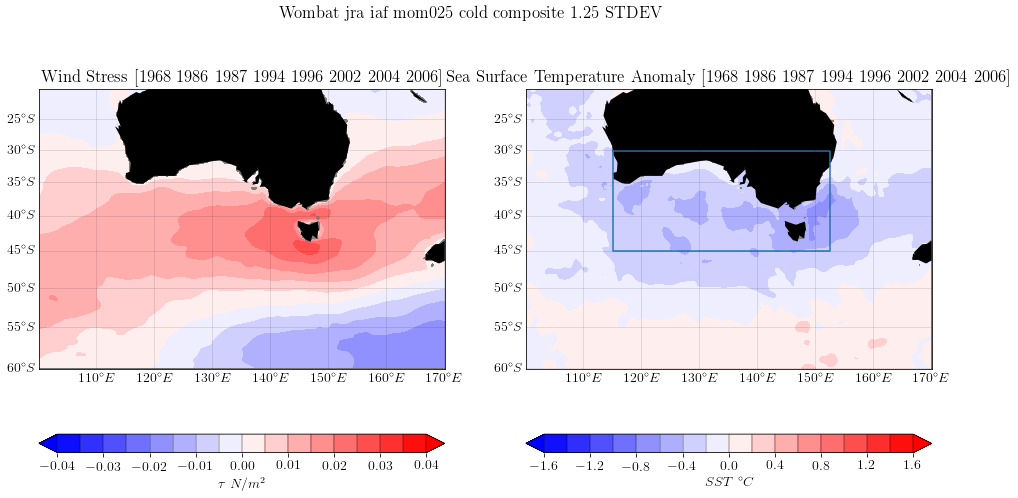

In [39]:
for lon_idx in range(boxes_lon_n):
    for lat_idx in range(boxes_lat_n):
        plt.close('all') 
        fig = plt.figure() 
        fig.set_size_inches(16, 8)

        ax = fig.add_subplot(row,col,1)
        cmap = plt.get_cmap('bwr')
        step = 0.005
        contf_lvls = np.arange(-0.04,0.04+1e-08,step)               

        ax.set_facecolor('grey')
        bm.drawcoastlines(linewidth=0.05)
        bm.fillcontinents(color='black')

        lons, lats = np.meshgrid(u_lon, u_lat)
        Bm_lons, Bm_lats = bm(lons, lats) 

        contf = bm.contourf(Bm_lons, Bm_lats, \
                            tau_x_anom_boxes_mean_compos_cold_std1p25[str(lon_idx)+','+str(lat_idx)], \
                            contf_lvls, cmap=cmap, extend='both')

        ax.set_title('Wind Stress ' + \
                     str(years_temp_anom_boxes_mean_compos_cold_std1p25[str(lon_idx)+','+str(lat_idx)]))

        bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
        bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])

        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$\tau$ $N/m^{2}$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])



        ax = fig.add_subplot(row,col,2)
        cmap = plt.get_cmap('bwr')
        step = 0.2
        contf_lvls = np.arange(-1.6,1.6+1e-08,step)              

        ax.set_facecolor('grey')
        bm.drawcoastlines(linewidth=0.05)
        bm.fillcontinents(color='black')

        lons, lats = np.meshgrid(t_lon, t_lat)
        Bm_lons, Bm_lats = bm(lons, lats) 

        contf = bm.contourf(Bm_lons, Bm_lats, \
                            temp_anom_boxes_mean_compos_cold_std1p25[str(lon_idx)+','+str(lat_idx)], \
                            contf_lvls, cmap=cmap, extend='both')
        
        Bm_boxes_lon, Bm_boxes_lat = bm(\
            [boxes_lon[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lon[str(lon_idx)+','+str(lat_idx)][0]],\
            [boxes_lat[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][1],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][0],
             boxes_lat[str(lon_idx)+','+str(lat_idx)][0]])
        plot = bm.plot(Bm_boxes_lon,Bm_boxes_lat)

        ax.set_title('Sea Surface Temperature Anomaly ' + \
                     str(years_temp_anom_boxes_mean_compos_cold_std1p25[str(lon_idx)+','+str(lat_idx)]))

        bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
        bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])

        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$SST$ $^{\circ}C$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])


        plt.suptitle(r"Wombat jra iaf mom025 cold composite 1.25 STDEV")
        
        
        output_ls = os.listdir(figures_path)
        if not script_name:
            script_name = 'test'
        elif script_name not in output_ls:
            os.mkdir(figures_path + '/' + script_name)

        plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
                    + '_fig1_' + str(lon_idx)+'-'+str(lat_idx) + '_cold.png', bbox_inches='tight', dpi=200)